# DPM

From <a href='https://arxiv.org/pdf/2012.09365.pdf'>this paper</a>, the authors have trained the Depth Prediction Module (DPM) using several various datasets, such as data coming from high-quality LiDAR sensors, and data coming from low-quality web stereo. 

Xian et al.'s paper from 2020 was particularly helpful in the DPM (can be found <a href="https://openaccess.thecvf.com/content_CVPR_2020/papers/Xian_Structure-Guided_Ranking_Loss_for_Single_Image_Depth_Prediction_CVPR_2020_paper.pdf">here</a> and Github <a href="https://github.com/KexianHust/Structure-Guided-Ranking-Loss/tree/master/models">here</a>), as the authors of the work Yin et. al. have trained their DPM based on Xian's architecture.

## Architecture Overview

As overview of this architecture, the ResNet50 has been used as the backbone framework for extracting significant features. Then this is followed up by a decoder layer. And synchronized stochastic gradient descent (SGD) with batch size 0 has been utilized in the training. Initially, the learning rate was set to 0.02 for each layer in the network. Then every 20 epochs, the learning rate decays by 0.1. All images are resized to size 448 x 448. And there is 0.5 probability that each image is flipped horizontally.

## Loss Functions

The authors Yin et al. utilize three different loss functions to train the DPM as follows:
<ol>
    <li> Image-level noramlized regression loss (novel) </li>
    <li> Pair-wise normal loss (novel) </li>
    <li> Multi-scale gradient loss (<a href="https://arxiv.org/pdf/1804.00607.pdf">Li and Snavely, 2018</a>) </li>
</ol>

### Image-level Normalized Regression Loss (ILNR)

The datasets used have varied depth ranges and some have depth scales and shifts that are not known. Thus, the proposed ILNR will be beneficial to address the problem. Mathematically, this is equal to:

$$\mathcal{L}_{ILNR} = \dfrac{1}{N} \sum_i^N \left| d_i - \bar{d}_i^* \right| + \left| \tanh \left( \frac{d_i}{100} \right) - \tanh \left( \frac{\bar{d}_i^*}{100} \right) \right|$$

where $\bar{d}_i^* = (d_i^* - \mu_{trim})/\sigma_{trim}$, $d$ is the predicted depth, $d^*$ is the ground truth, $\mu_{trim}$ is the mean of a trimmed depth map and $\sigma_{trim}$ is the standard deviation of a trimmed depth map. This trimmed depth map has 10\% of the pixels cut off.

The authors have observed that other normalization methods do not fair well, compared to ILNR. They have also tried min-max normalization, z-score standardization, and median absolute deviation (MAD).

### Pairwise Normal Loss (PWN)

This loss has been proposed in order to improve the images' local geometric features. Xian et al.'s <a href="https://openaccess.thecvf.com/content_CVPR_2020/papers/Xian_Structure-Guided_Ranking_Loss_for_Single_Image_Depth_Prediction_CVPR_2020_paper.pdf">paper</a> designed a structure-guided ranking loss designed to improve sharpness in edges. Now here, Yin et al. follows a similar sampling method (edge-guided sampling) but supervises on surface normal space. But to constraint both global and local geometric relations, planes are also considered aside from edges. 

For the surface normal to be reconstructed from the 3D point cloud, this is done through least squares fit. Prior to this, the ground truth depths and the predicted depths need to be aligned first via a scale and shift factor. To improve the quality of the global geometry, paired points are sampled randomly globally. If the sampled points are $\{(A_i, B_i), i = 0,..,N \}$ then the corresponding normals are $\{(n_{A_i}, n_{B_i}), i=0,..,N \}$ with the following defined PWN loss:

$$\mathcal{L}_{PWN} = \dfrac{1}{N} \sum_i^N \left| n_{A_i} \cdot n_{B_i} - n_{A_i}^* \cdot n_{B_i}^* \right|$$

where $n^*$ represents ground truth normals.

### Multi-scale Gradient Loss (MSG)

Proposed by Li and Snavely in 2018, this loss enables smoother gradient changes and sharper depth discontinuities in the prediction depth map. Mathemtatically, this would ne defined as:

$$\mathcal{L}_{MSG} = \dfrac{1}{N} \sum_{k=1}^K \sum_{i=1}^N \left| \nabla_x^k d_i - \nabla_y^k \bar{d}_i^* \right| + \left| \nabla_y^k d_i - \nabla_y^k \bar{d}_i^* \right|$$

### Overall Loss

They defined the overall loss function is as follows:

$$\mathcal{L} = \mathcal{L}_{PWN} + \mathcal{L}_{ILNR} + 0.5\mathcal{L}_{MSG}$$

## Comparing Model Performances with SOTA for Depth Prediction

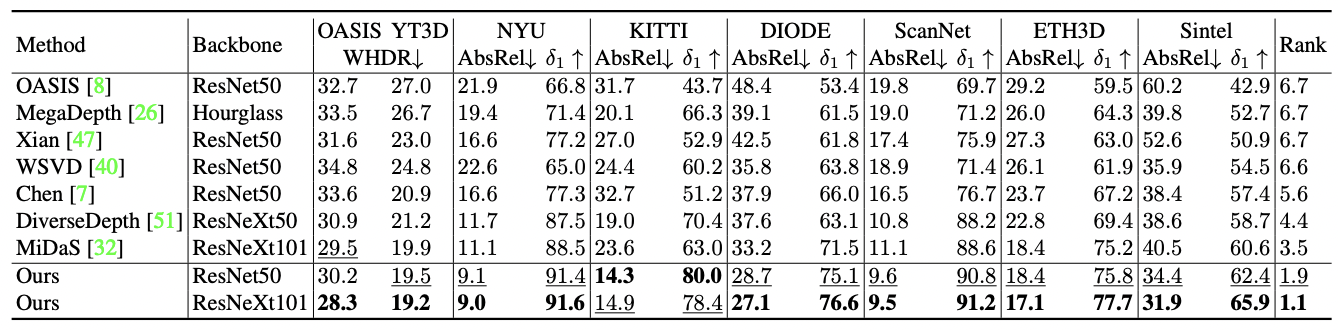

<a href="https://arxiv.org/pdf/2012.09365.pdf">Yin et al.’s model</a> can outperform state-of-the-art models.  Some of the models include <a href="https://arxiv.org/pdf/2007.13215.pdf">OASIS</a>, <a href="https://arxiv.org/pdf/1804.00607.pdf">MegaDepth</a>, <a href="https://openaccess.thecvf.com/content_CVPR_2020/papers/Xian_Structure-Guided_Ranking_Loss_for_Single_Image_Depth_Prediction_CVPR_2020_paper.pdf">Xian</a>, <a href="https://arxiv.org/pdf/1904.11112.pdf">WSVD</a>, <a href="https://openaccess.thecvf.com/content_CVPR_2019/papers/Chen_Learning_Single-Image_Depth_From_Videos_Using_Quality_Assessment_Networks_CVPR_2019_paper.pdf">Chen</a>, <a href="https://arxiv.org/pdf/2002.00569.pdf">DiverseDepth</a>, and <a href="https://arxiv.org/pdf/1907.01341.pdf">MiDaS</a>. We pick one of them: <a href="https://openaccess.thecvf.com/content_CVPR_2020/papers/Xian_Structure-Guided_Ranking_Loss_for_Single_Image_Depth_Prediction_CVPR_2020_paper.pdf">Xian's</a> to compare; as it was similar to <a href="https://arxiv.org/pdf/2012.09365.pdf">Yin et al.’s model</a> — in particular, <a href="https://arxiv.org/pdf/2012.09365.pdf">Yin et al.</a> trained their model using a similar architecture as <a href="https://openaccess.thecvf.com/content_CVPR_2020/papers/Xian_Structure-Guided_Ranking_Loss_for_Single_Image_Depth_Prediction_CVPR_2020_paper.pdf">Xian et al's</a>. Similarities include: <a href="https://github.com/KaimingHe/deep-residual-networks">ResNet50</a> backbone, a batch size of 40, initial learning rate of 0.02, resizing of images to 448 x 448 resolutions and a 0.5 chance of horizontal image flips. However some of the differences include: <a href="https://arxiv.org/pdf/2012.09365.pdf">Yin et al.’s model</a> has a learning decay of 0.1 while <a href="https://openaccess.thecvf.com/content_CVPR_2020/papers/Xian_Structure-Guided_Ranking_Loss_for_Single_Image_Depth_Prediction_CVPR_2020_paper.pdf">Xian et al.</a> incurs the decay after 20 epochs. Also, <a href="https://arxiv.org/pdf/2012.09365.pdf">Yin et al.</a> also considered a <a href="https://github.com/facebookresearch/ResNeXt">ResNeXt101</a> backbone which further improved the performance of the model. As a result of <a href="https://arxiv.org/pdf/2012.09365.pdf">Yin et al.'s</a> improvements over <a href="https://openaccess.thecvf.com/content_CVPR_2020/papers/Xian_Structure-Guided_Ranking_Loss_for_Single_Image_Depth_Prediction_CVPR_2020_paper.pdf">Xian et al.'s</a>, their model improved by as much as 3.1% on average given that the backbone of model uses <a href="https://github.com/KaimingHe/deep-residual-networks">ResNet50</a> and 3.4% on average given that the backbone uses <a href="https://github.com/facebookresearch/ResNeXt">ResNeXt101</a>.

## Notes

<ul>
    <li> Note that the DPM architecture is borrowed from Xian et al.'s work as the authors Yin et al. followed their model and is not one of their novel contributions. Due to time constraints, we reuse Xian's <a href="https://github.com/KexianHust/Structure-Guided-Ranking-Loss/blob/master/models/DepthNet.py">DepthNet model</a>, but had we had more time, we can read through Xian et al.'s paper and implement it from scratch. </li>
    <li> What is the main novelty in the DPM though is the ILNR and PWN losses and this was coded from scratch. </li>
    <li> ... </li>
</ul>